# Задача 3. Многоклассовая классификация и множественная классификация/регрессия

* **Дедлайн**: 11.12.2022, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [x] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [ ] * (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [x] * (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.
## Выполнил: Иванов Кирилл Андреевич (19.Б11-мм)

## Wheat classification

Датасет содержит характиристики семян пшеницы разных сортов. Цель -- предсказать сорт пшеницы. Скачать датасет можно [здесь](https://archive.ics.uci.edu/ml/datasets/seeds).

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from scipy import stats

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [227]:
df = pd.read_csv(
    "../data/wheat/seeds_dataset.txt",
    delimiter="\t",
    header=None,
    names=[
        "area",
        "perimeter",
        "compactness",
        "kernel_length",
        "kernel_width",
        "asymmetry_coefficient",
        "kernel_groove_length",
        "type",
    ],
)
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<IPython.core.display.Javascript object>

### Характеристики
- area (A): площадь зерна
- perimeter (P): периметер зерна
- compactness: $4\times \pi \times A/P^{2}$
- kernel_length: длина ядра
- kernel_width: ширина ядра
- asymmetry_coefficient: коэффициент асимметрии
- kernel_groove_length: длина борозды ядра
- type: тип зерна (Kama, Rosa or Canadian), целевой признак

### EDA

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   kernel_groove_length   210 non-null    float64
 7   type                   210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


<IPython.core.display.Javascript object>

Все характеристики вещественные (кроме целевого)

In [229]:
df.shape

(210, 8)

<IPython.core.display.Javascript object>

In [230]:
df.isnull().sum()

area                     0
perimeter                0
compactness              0
kernel_length            0
kernel_width             0
asymmetry_coefficient    0
kernel_groove_length     0
type                     0
dtype: int64

<IPython.core.display.Javascript object>

Пропусков нет

In [231]:
df["type"] = df["type"].astype("category")

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='type', ylabel='count'>

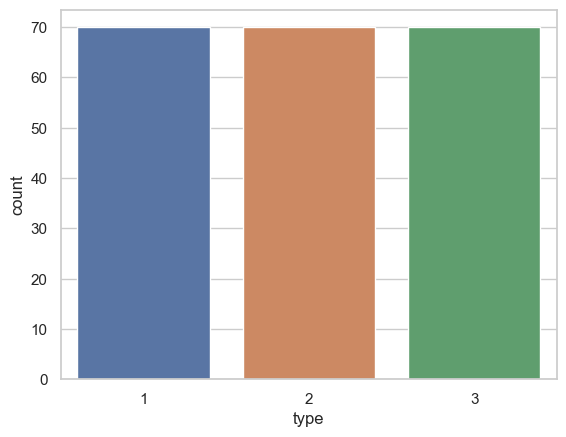

<IPython.core.display.Javascript object>

In [232]:
sns.countplot(data=df, x="type")

In [233]:
df.type.value_counts()

1    70
2    70
3    70
Name: type, dtype: int64

<IPython.core.display.Javascript object>

Классы сбалансированы 

In [234]:
df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


<IPython.core.display.Javascript object>

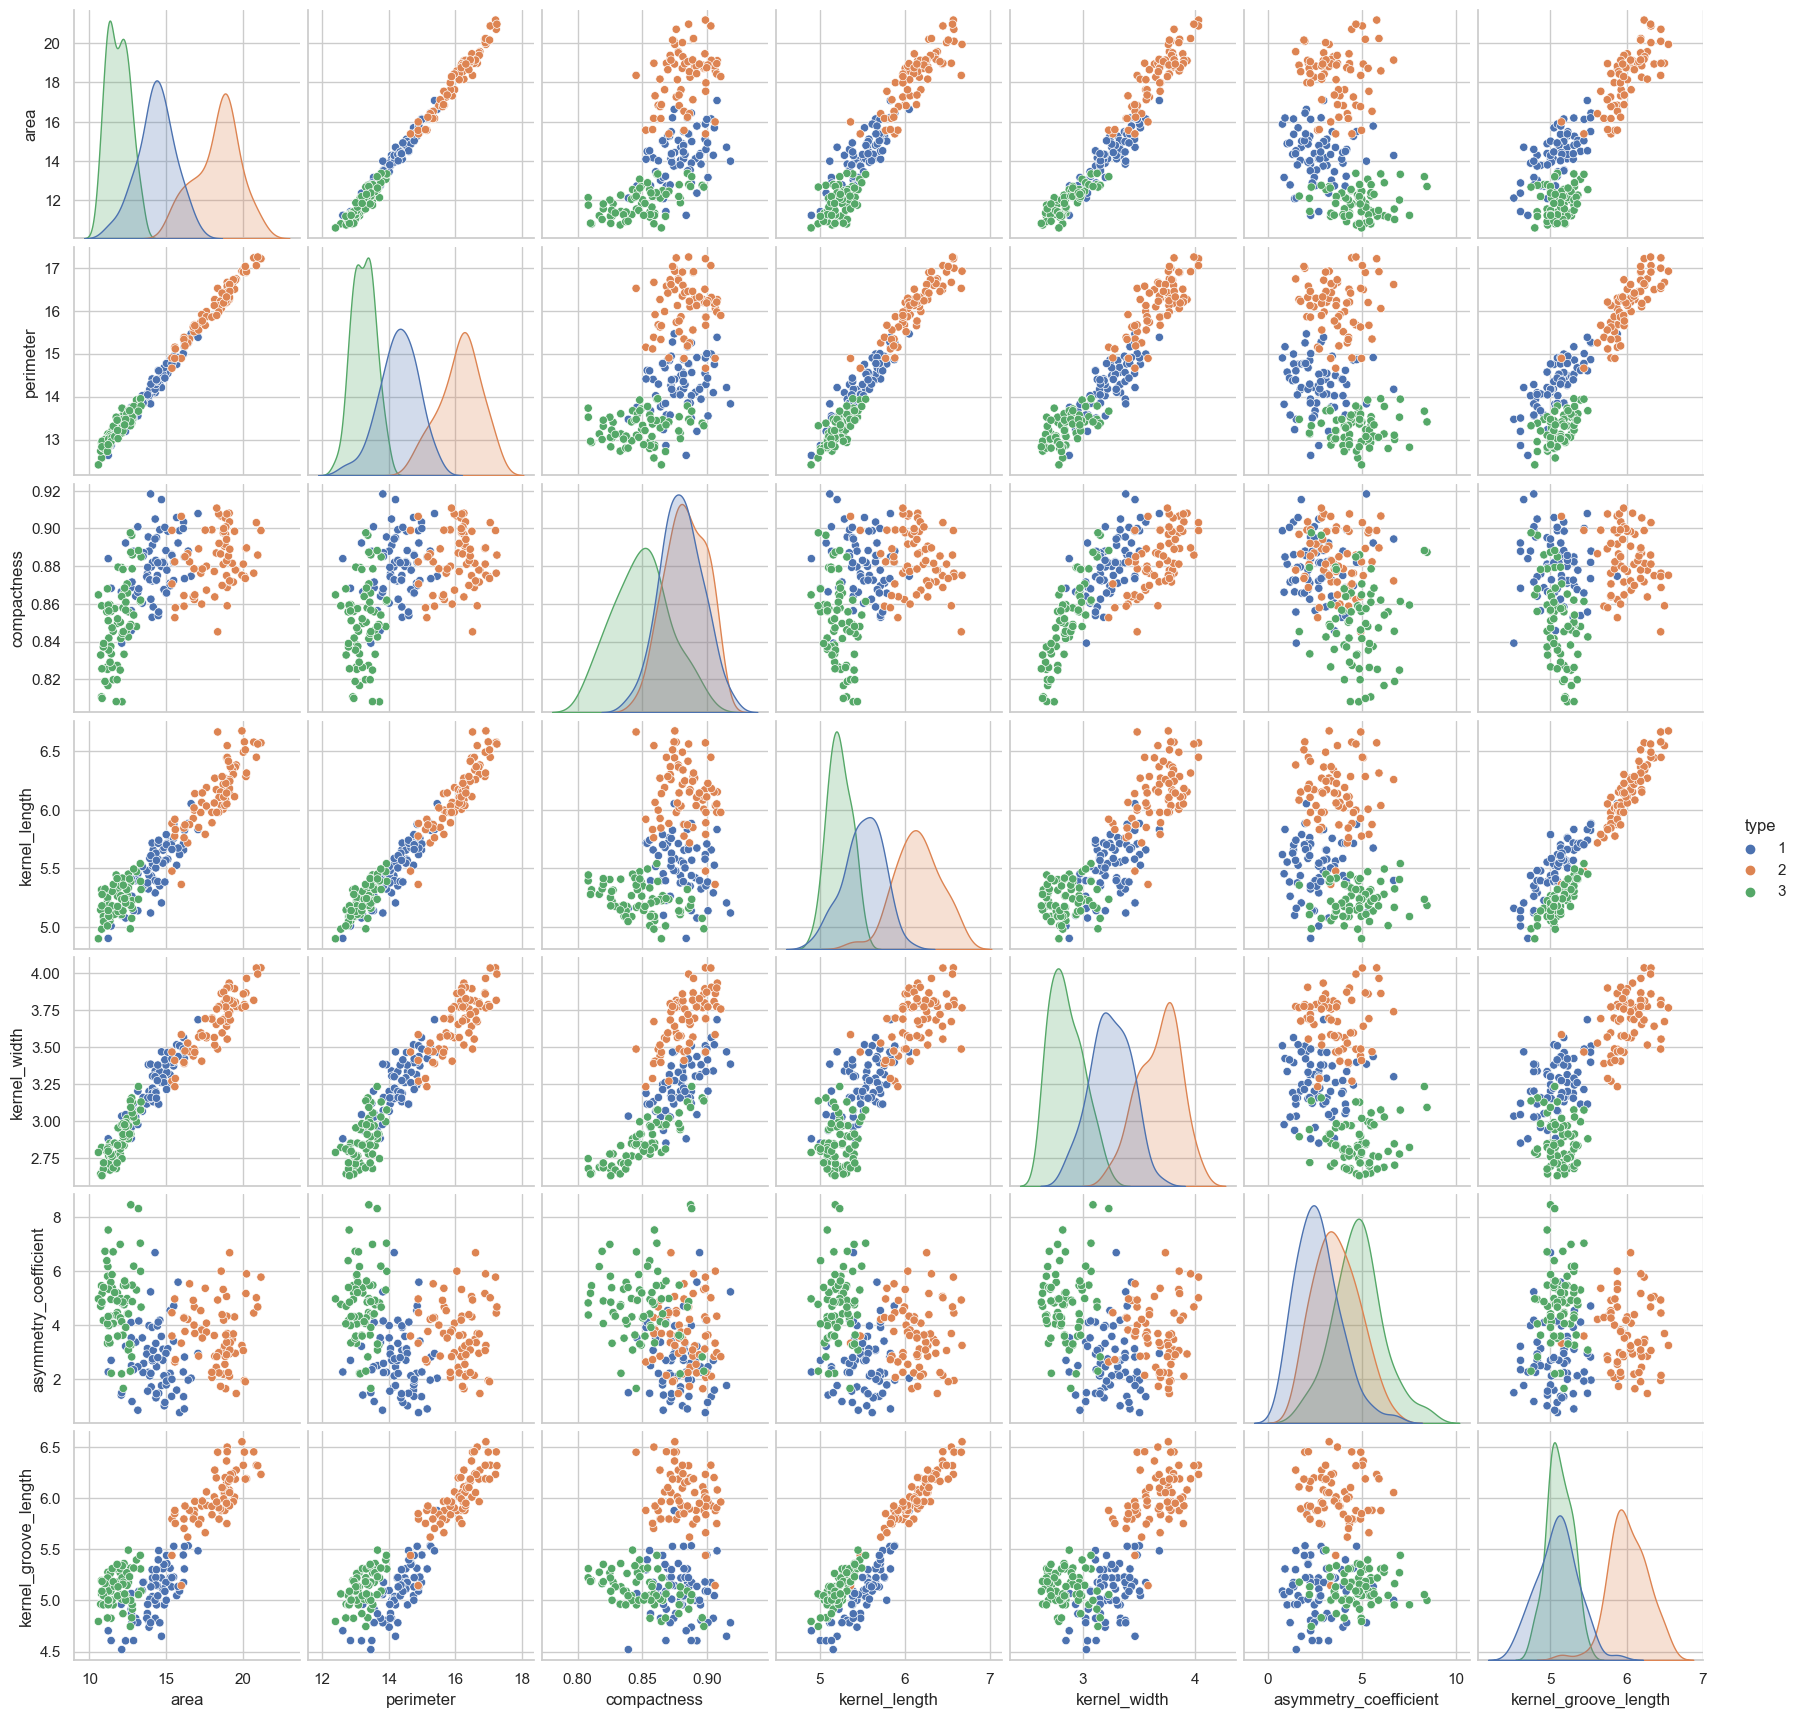

<IPython.core.display.Javascript object>

In [235]:
sns.pairplot(df, hue="type")

Можно заметить, что характеристики `area`, `perimeter`, `kernel_length` и `kernel_width` хорошо разделяют выборку

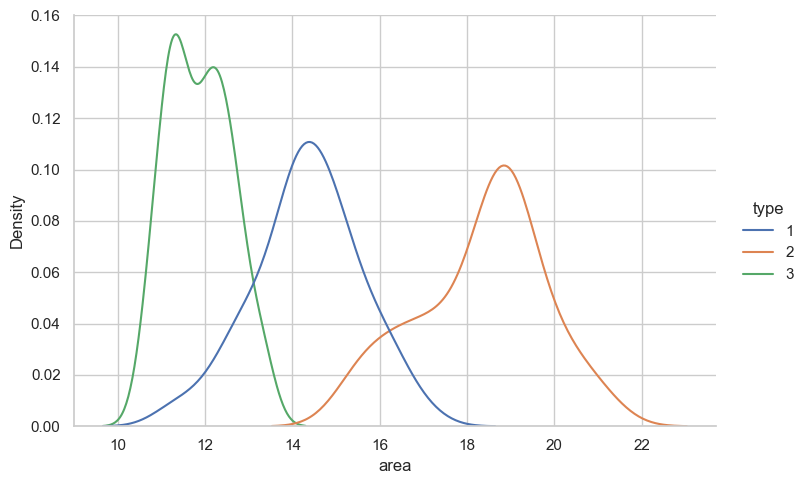

<IPython.core.display.Javascript object>

In [236]:
ax = sns.displot(x="area", data=df, kind="kde", hue="type", height=5, aspect=1.5)
plt.show()

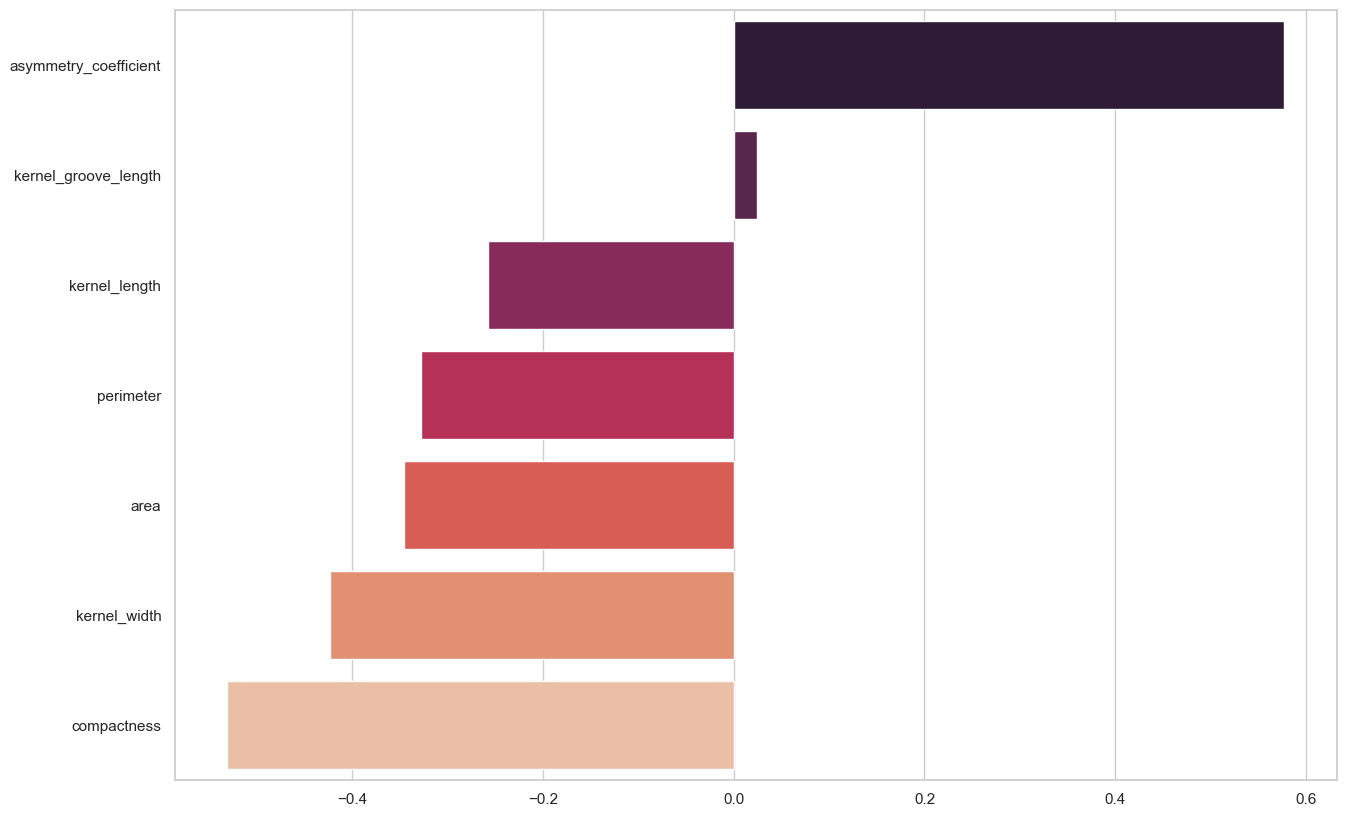

<IPython.core.display.Javascript object>

In [237]:
y = df["type"]
X = df.drop(columns=["type"])


correlations = X.corrwith(y).sort_values(ascending=False)
palette = sns.color_palette("rocket", correlations.size)
plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)
plot.figure.set_size_inches(15, 10)

In [238]:
correlations

asymmetry_coefficient    0.577273
kernel_groove_length     0.024301
kernel_length           -0.257269
perimeter               -0.327900
area                    -0.346058
kernel_width            -0.423463
compactness             -0.531007
dtype: float64

<IPython.core.display.Javascript object>

### Построение моделей

Каждый пайплайн состоит из следующих шагов:

- Scaling;
- RFE;
- Classification.

При подборе гиперпараметров будем использовать `roc_auc` в качестве метрики.

In [239]:
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [240]:
from sklearn.multiclass import (
    OneVsRestClassifier,
    OneVsOneClassifier,
    OutputCodeClassifier,
)

<IPython.core.display.Javascript object>

In [241]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracies = {}
times = {}

<IPython.core.display.Javascript object>

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


def create_logistic_regression(C=1.0):
    pipeline = Pipeline(
        steps=[
            ("scaling", StandardScaler()),
            ("rfe", RFECV(estimator=LogisticRegression())),
            ("classification", LogisticRegression(C=C)),
        ]
    )
    return pipeline


def create_decision_tree(max_depth=10, min_samples_split=2, min_samples_leaf=1):
    pipeline = Pipeline(
        steps=[
            ("scaling", StandardScaler()),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                ),
            ),
        ]
    )
    return pipeline


def create_knn(n_neighbors=3):
    pipeline = Pipeline(
        steps=[
            ("scaling", StandardScaler()),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                KNeighborsClassifier(n_neighbors=3),
            ),
        ]
    )
    return pipeline


def create_nb(var_smoothing=1e-09):
    pipeline = Pipeline(
        steps=[
            ("scaling", StandardScaler()),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                GaussianNB(var_smoothing=var_smoothing),
            ),
        ]
    )
    return pipeline


def create_svm(C=1.0):
    pipeline = Pipeline(
        steps=[
            ("scaling", StandardScaler()),
            ("rfe", RFECV(estimator=LogisticRegression())),
            (
                "classification",
                SVC(C=C, probability=True),
            ),
        ]
    )
    return pipeline

<IPython.core.display.Javascript object>

### Разделение выборки на обучающую и тестовую

In [243]:
y = df["type"]
X = df.drop(columns=["type"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

<IPython.core.display.Javascript object>

### Функция для оценки времени обучения

In [244]:
from sklearn.model_selection import cross_validate


def get_fit_time(model, X_train, y_train):
    return cross_validate(model, X_train, y_train, cv=5)["fit_time"].mean()

<IPython.core.display.Javascript object>

### Logistic Regression

**Подбор гиперпараметров**

In [245]:
from sklearn.model_selection import GridSearchCV

Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_logistic_regression(),
    [{"classification__C": Cs}],
    scoring="roc_auc_ovr",
    error_score="raise",
    cv=5,
)
searcher.fit(X_train, y_train)

best_C = searcher.best_params_["classification__C"]

<IPython.core.display.Javascript object>

**OneVsRest**

In [246]:
lr_pipe = create_logistic_regression(best_C)
lr_pipe = OneVsRestClassifier(lr_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, lr_pipe.predict(X_test))
time = get_fit_time(lr_pipe, X_train, y_train)
accuracies["Logistic Regression (OneVsRest)"] = acc
times["Logistic Regression (OneVsRest)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9206349206349206
Mean fit time 0.16872310638427734


<IPython.core.display.Javascript object>

**OneVsOne**

In [247]:
lr_pipe = create_logistic_regression(best_C)
lr_pipe = OneVsOneClassifier(lr_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, lr_pipe.predict(X_test))
time = get_fit_time(lr_pipe, X_train, y_train)
accuracies["Logistic Regression (OneVsOne)"] = acc
times["Logistic Regression (OneVsOne)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9365079365079365
Mean fit time 0.15220823287963867


<IPython.core.display.Javascript object>

**OutputCode**

In [248]:
lr_pipe = create_logistic_regression(best_C)
lr_pipe = OutputCodeClassifier(lr_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, lr_pipe.predict(X_test))
time = get_fit_time(lr_pipe, X_train, y_train)
accuracies["Logistic Regression (OutputCode)"] = acc
times["Logistic Regression (OutputCode)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9206349206349206
Mean fit time 0.1575918674468994


<IPython.core.display.Javascript object>

### Decision Tree

**Подбор гиперпараметров**

In [249]:
depths = np.arange(7, 15)
min_samples_splits = [2, 5, 7]
min_samples_leafs = [1, 3, 5]

searcher = GridSearchCV(
    create_decision_tree(),
    [
        {
            "classification__max_depth": depths,
            "classification__min_samples_split": min_samples_splits,
            "classification__min_samples_leaf": min_samples_leafs,
        }
    ],
    scoring="roc_auc_ovr",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)

best_depth = searcher.best_params_["classification__max_depth"]
best_min_samples_split = searcher.best_params_["classification__min_samples_split"]
best_min_samples_leaf = searcher.best_params_["classification__min_samples_leaf"]

<IPython.core.display.Javascript object>

**OneVsRest**

In [250]:
dt_pipe = create_decision_tree(
    best_depth, best_min_samples_split, best_min_samples_leaf
)
dt_pipe = OneVsRestClassifier(dt_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, dt_pipe.predict(X_test))
time = get_fit_time(dt_pipe, X_train, y_train)
accuracies["Decision Tree (OneVsRest)"] = acc
times["Decision Tree (OneVsRest)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9206349206349206
Mean fit time 0.19294676780700684


<IPython.core.display.Javascript object>

**OneVsOne**

In [251]:
dt_pipe = create_decision_tree(
    best_depth, best_min_samples_split, best_min_samples_leaf
)
dt_pipe = OneVsOneClassifier(dt_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, dt_pipe.predict(X_test))
time = get_fit_time(dt_pipe, X_train, y_train)
accuracies["Decision Tree (OneVsOne)"] = acc
times["Decision Tree (OneVsOne)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9047619047619048
Mean fit time 0.15951428413391114


<IPython.core.display.Javascript object>

**OutputCode**

In [252]:
dt_pipe = create_decision_tree(
    best_depth, best_min_samples_split, best_min_samples_leaf
)
dt_pipe = OutputCodeClassifier(dt_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, dt_pipe.predict(X_test))
time = get_fit_time(dt_pipe, X_train, y_train)
accuracies["Decision Tree (OutputCode)"] = acc
times["Decision Tree (OutputCode)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.8571428571428571
Mean fit time 0.14201569557189941


<IPython.core.display.Javascript object>

### KNN

**Подбор гиперпараметров**

In [253]:
n_neighbors = [1, 3, 5, 7, 9, 11]
searcher = GridSearchCV(
    create_knn(),
    [
        {
            "classification__n_neighbors": n_neighbors,
        }
    ],
    scoring="roc_auc_ovr",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)

best_n_neighbors = searcher.best_params_["classification__n_neighbors"]

<IPython.core.display.Javascript object>

**OneVsRest**

In [254]:
knn_pipe = create_knn(best_n_neighbors)
knn_pipe = OneVsRestClassifier(knn_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, knn_pipe.predict(X_test))
time = get_fit_time(knn_pipe, X_train, y_train)
accuracies["KNN (OneVsRest)"] = acc
times["KNN (OneVsRest)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9206349206349206
Mean fit time 0.1872075080871582


<IPython.core.display.Javascript object>

**OneVsOne**

In [255]:
knn_pipe = create_knn(best_n_neighbors)
knn_pipe = OneVsOneClassifier(knn_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, knn_pipe.predict(X_test))
time = get_fit_time(knn_pipe, X_train, y_train)
accuracies["KNN (OneVsOne)"] = acc
times["KNN (OneVsOne)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9365079365079365
Mean fit time 0.16228933334350587


<IPython.core.display.Javascript object>

**OutputCode**

In [256]:
knn_pipe = create_knn(best_n_neighbors)
knn_pipe = OutputCodeClassifier(knn_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, knn_pipe.predict(X_test))
time = get_fit_time(knn_pipe, X_train, y_train)
accuracies["KNN (OutputCode)"] = acc
times["KNN (OutputCode)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.6031746031746031
Mean fit time 0.16366925239562988


<IPython.core.display.Javascript object>

### Naive Bayes

**Подбор гиперпараметров**

In [257]:
var_smoothing = np.logspace(0, -9, num=50)
searcher = GridSearchCV(
    create_nb(),
    [
        {
            "classification__var_smoothing": var_smoothing,
        }
    ],
    scoring="roc_auc_ovr",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_var_smoothing = searcher.best_params_["classification__var_smoothing"]

<IPython.core.display.Javascript object>

**OneVsRest**

In [258]:
nb_pipe = create_nb(best_var_smoothing)
nb_pipe = OneVsRestClassifier(nb_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, nb_pipe.predict(X_test))
time = get_fit_time(nb_pipe, X_train, y_train)
accuracies["Naive Bayes (OneVsRest)"] = acc
times["Naive Bayes (OneVsRest)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.8888888888888888
Mean fit time 0.17036194801330568


<IPython.core.display.Javascript object>

**OneVsOne**

In [259]:
nb_pipe = create_nb(best_var_smoothing)
nb_pipe = OneVsOneClassifier(nb_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, nb_pipe.predict(X_test))
time = get_fit_time(nb_pipe, X_train, y_train)
accuracies["Naive Bayes (OneVsOne)"] = acc
times["Naive Bayes (OneVsOne)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9047619047619048
Mean fit time 0.15519561767578124


<IPython.core.display.Javascript object>

**OutputCode**

In [260]:
nb_pipe = create_nb(best_var_smoothing)
nb_pipe = OutputCodeClassifier(nb_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, nb_pipe.predict(X_test))
time = get_fit_time(nb_pipe, X_train, y_train)
accuracies["Naive Bayes (OutputCode)"] = acc
times["Naive Bayes (OutputCode)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.8571428571428571
Mean fit time 0.142824125289917


<IPython.core.display.Javascript object>

### SVM

**Подбор гиперпараметров**

In [261]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_svm(),
    [{"classification__C": Cs}],
    scoring="roc_auc_ovr",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train, y_train)
best_C = searcher.best_params_["classification__C"]

<IPython.core.display.Javascript object>

**OneVsRest**

In [262]:
svm_pipe = create_svm(best_C)
svm_pipe = OneVsRestClassifier(svm_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, svm_pipe.predict(X_test))
time = get_fit_time(svm_pipe, X_train, y_train)
accuracies["SVM (OneVsRest)"] = acc
times["SVM (OneVsRest)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9206349206349206
Mean fit time 0.16830992698669434


<IPython.core.display.Javascript object>

**OneVsOne**

In [263]:
svm_pipe = create_svm(best_C)
svm_pipe = OneVsOneClassifier(svm_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, svm_pipe.predict(X_test))
time = get_fit_time(svm_pipe, X_train, y_train)
accuracies["SVM (OneVsOne)"] = acc
times["SVM (OneVsOne)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.9523809523809523
Mean fit time 0.15357275009155275


<IPython.core.display.Javascript object>

**OutputCode**

In [264]:
svm_pipe = create_svm(best_C)
svm_pipe = OutputCodeClassifier(svm_pipe).fit(X_train, y_train)
acc = accuracy_score(y_test, svm_pipe.predict(X_test))
time = get_fit_time(svm_pipe, X_train, y_train)
accuracies["SVM (OutputCode)"] = acc
times["SVM (OutputCode)"] = time
print(f"Test accuracy {acc}")
print(f"Mean fit time {time}")

Test accuracy 0.6190476190476191
Mean fit time 0.15954489707946778


<IPython.core.display.Javascript object>

### Сравнение моделей

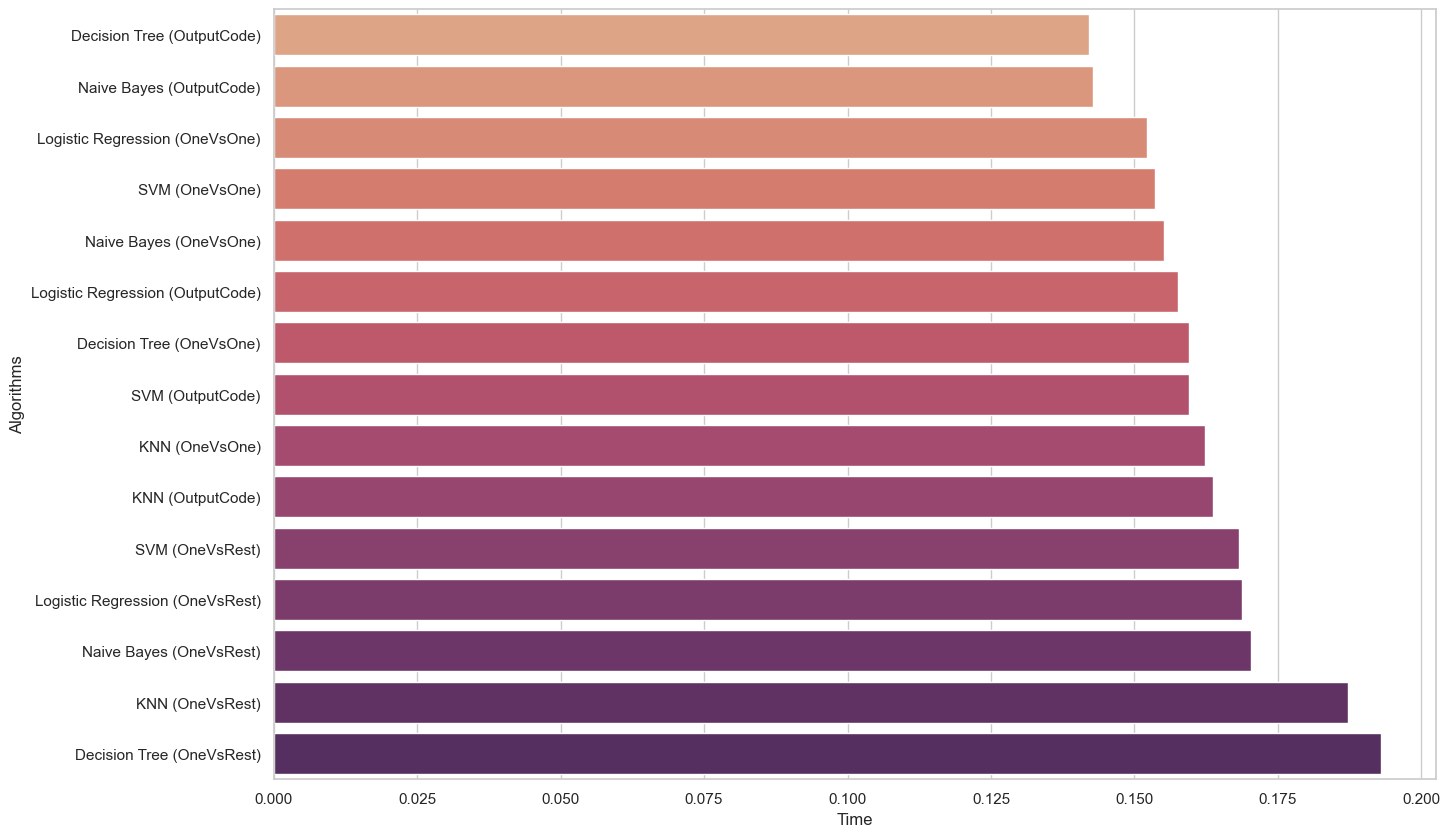

<IPython.core.display.Javascript object>

In [265]:
times = dict(sorted(times.items(), key=lambda item: item[1]))

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Algorithms")
plt.xlabel("Time")
plot = sns.barplot(
    x=list(times.values()),
    y=list(times.keys()),
    palette=sns.color_palette("flare", len(times)),
)
plot.figure.set_size_inches(15, 10)
plt.show()

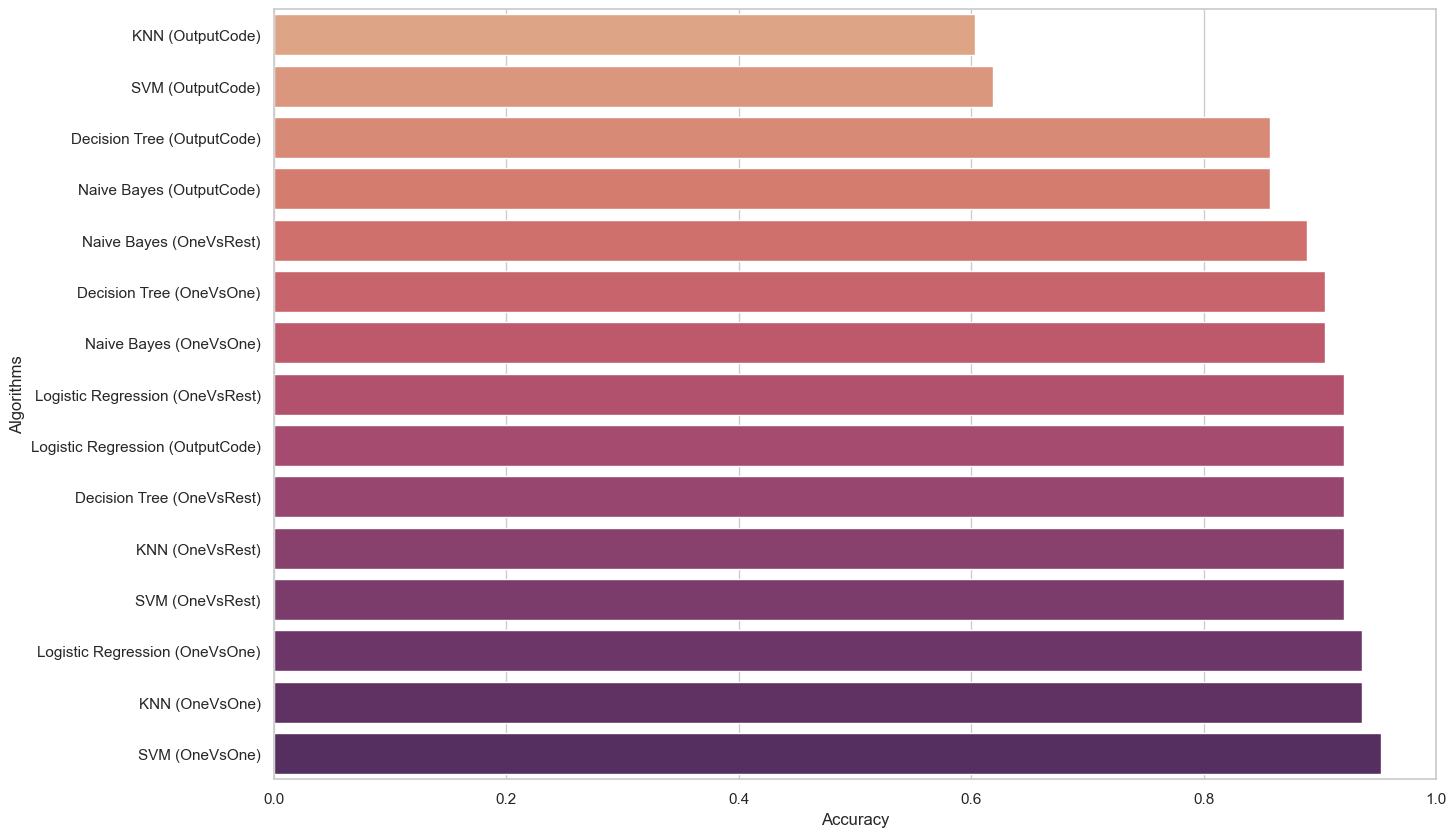

<IPython.core.display.Javascript object>

In [266]:
accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1]))

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Algorithms")
plt.xlabel("Accuracy")
plot = sns.barplot(
    x=list(accuracies.values()),
    y=list(accuracies.keys()),
    palette=sns.color_palette("flare", len(accuracies)),
)
plot.figure.set_size_inches(15, 10)
plt.show()

### Выводы

- на текущем наборе данных стратегии `OutputCode` обучаются в среднем дольше остальных, в то же время `OneVsOne` -- быстрее остальных;
- с точки зрения `accuracy`, стратегии `OneVsOne` показывают несколько превосходящие результаты;
- лучше всего себя проявили `SVM`, `KNN` и `Logistic Regression`, использующие стратегию `OneVsOne`.

In [267]:
from sklearn.datasets import load_linnerud

<IPython.core.display.Javascript object>

## Energy Efficiency Dataset (Multioutput Regression)

Датасет содержит 12 различных форм зданий, смоделированных в Ecotect. Здания различаются по площади остекления, распределению площади остекления, ориентации и другим параметрам. Набор данных состоит из 768 записей и 8 признаков, предназначенных для предсказания вещественных целевых значений `Heating Load` и `Cooling Load`. Скачать датасет можно [здесь](https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset).

### Характеристики

- Relative Compactness
- Surface Area
- Wall Area
- Roof Area
- Overall Height
- Orientation
- Glazing Area
- Glazing Area Distribution
- Heating Load (target 1)
- Cooling Load (target 2)

In [268]:
df = pd.read_csv("../data/energy/ENB2012_data.csv")
df.rename(
    columns={
        "X1": "Relative Compactness",
        "X2": "Surface Area",
        "X3": "Wall Area",
        "X4": "Roof Area",
        "X5": "Overall Height",
        "X6": "Orientation",
        "X7": "Glazing Area",
        "X8": "Glazing Area Distribution",
        "Y1": "Heating Load",
        "Y2": "Cooling Load",
    },
    inplace=True,
)
df.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<IPython.core.display.Javascript object>

### EDA

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


<IPython.core.display.Javascript object>

In [270]:
df.shape

(768, 10)

<IPython.core.display.Javascript object>

In [271]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

<IPython.core.display.Javascript object>

Пропусков нет

In [272]:
df.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

<IPython.core.display.Javascript object>

Потенциально все признаки могут быть категориальными

<AxesSubplot: xlabel='Heating Load', ylabel='Density'>

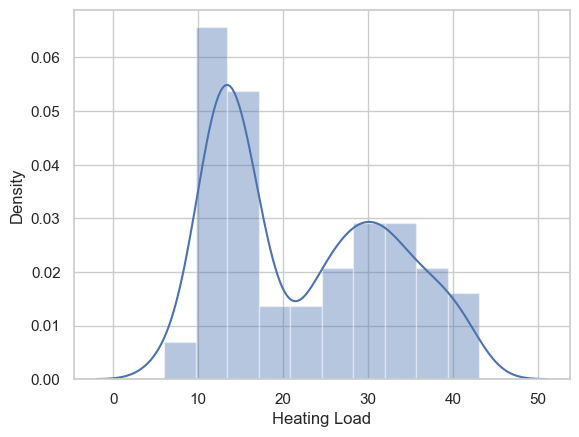

<IPython.core.display.Javascript object>

In [273]:
sns.distplot(df["Heating Load"])

<AxesSubplot: xlabel='Cooling Load', ylabel='Density'>

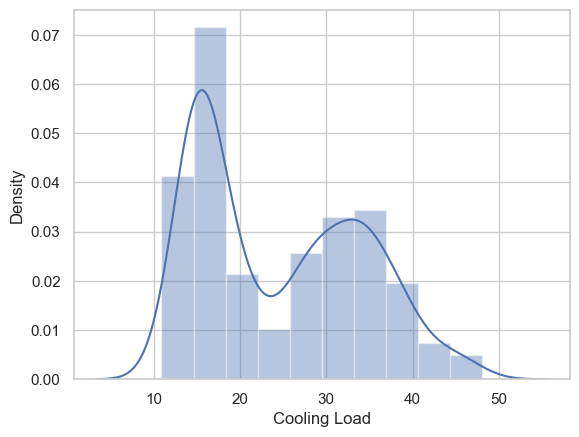

<IPython.core.display.Javascript object>

In [274]:
sns.distplot(df["Cooling Load"])

In [275]:
df["Heating Load"].corr(df["Cooling Load"])

0.9758618134328575

<IPython.core.display.Javascript object>

Видно, что целевые признаки очень сильно коррелируют и имеют бимодальное распределение 

In [276]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

<IPython.core.display.Javascript object>

In [277]:
def targets_scatterplot(x):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
    sns.scatterplot(
        x=x,
        y="Cooling Load",
        ax=axs[0],
        data=df,
    )
    sns.scatterplot(
        x=x,
        y="Heating Load",
        ax=axs[1],
        data=df,
    )


def targets_lineplot(x):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
    sns.lineplot(
        x=x,
        y="Cooling Load",
        ax=axs[0],
        data=df,
    )
    sns.lineplot(
        x=x,
        y="Heating Load",
        ax=axs[1],
        data=df,
    )

<IPython.core.display.Javascript object>

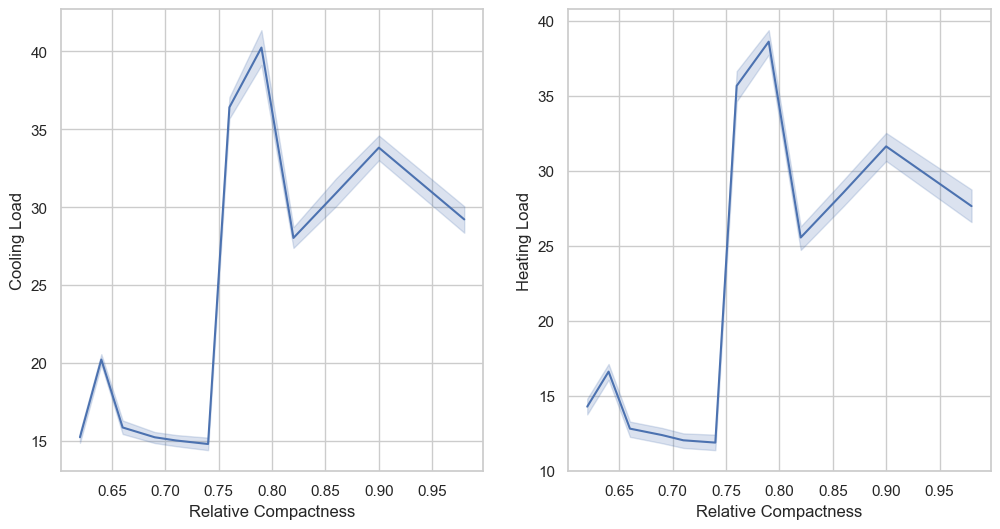

<IPython.core.display.Javascript object>

In [278]:
targets_lineplot("Relative Compactness")

In [279]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

<IPython.core.display.Javascript object>

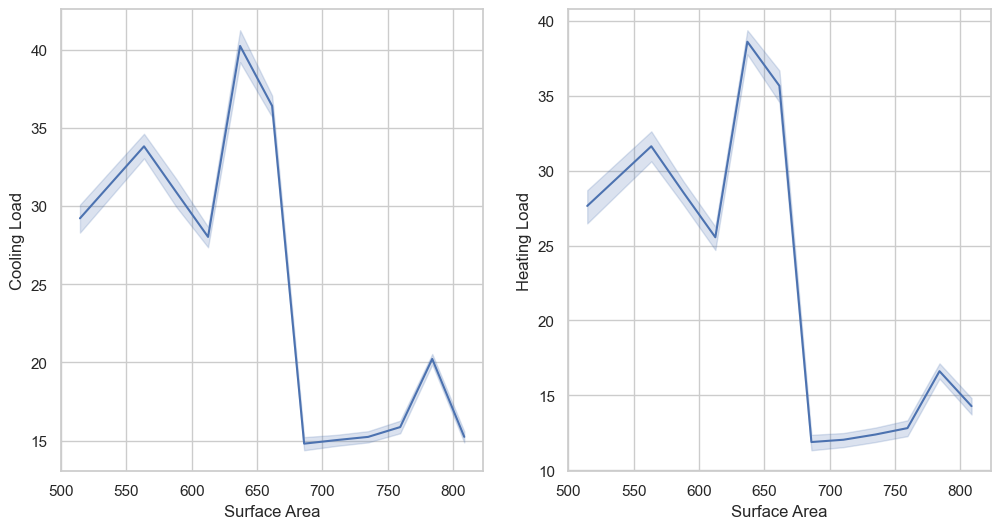

<IPython.core.display.Javascript object>

In [280]:
targets_lineplot("Surface Area")

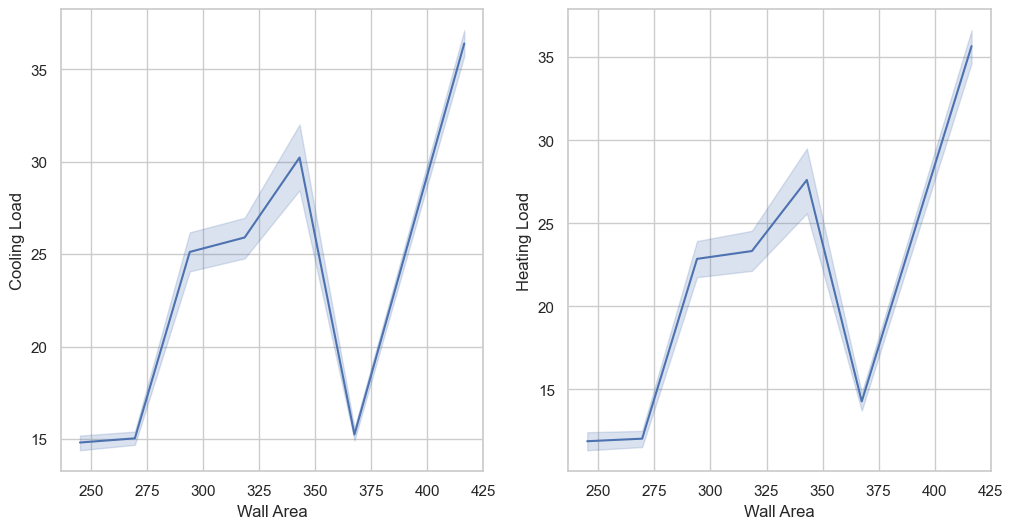

<IPython.core.display.Javascript object>

In [281]:
targets_lineplot("Wall Area")

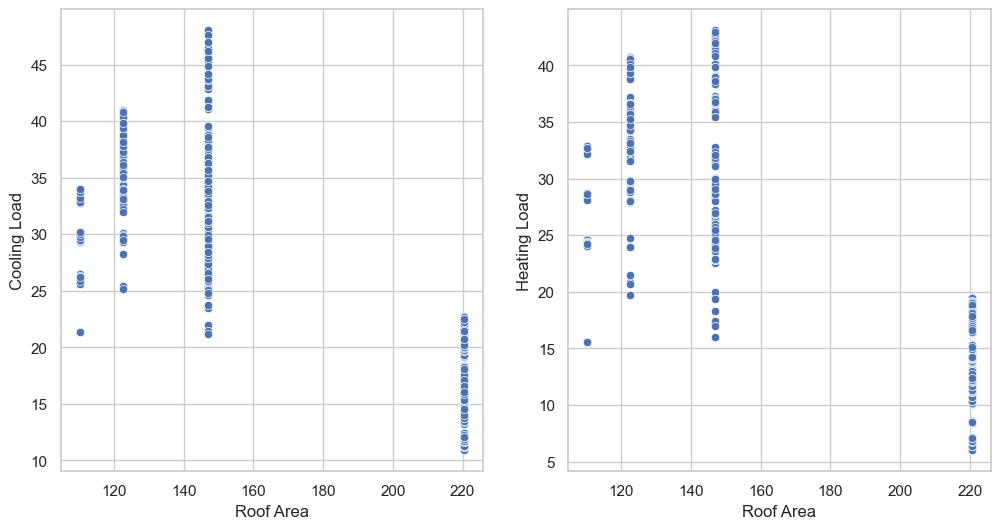

<IPython.core.display.Javascript object>

In [282]:
targets_scatterplot("Roof Area")

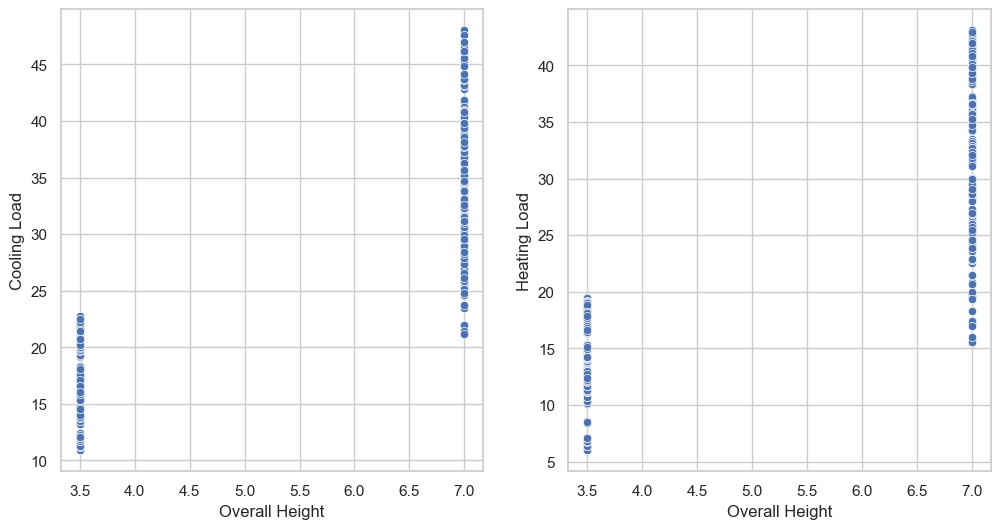

<IPython.core.display.Javascript object>

In [283]:
targets_scatterplot("Overall Height")

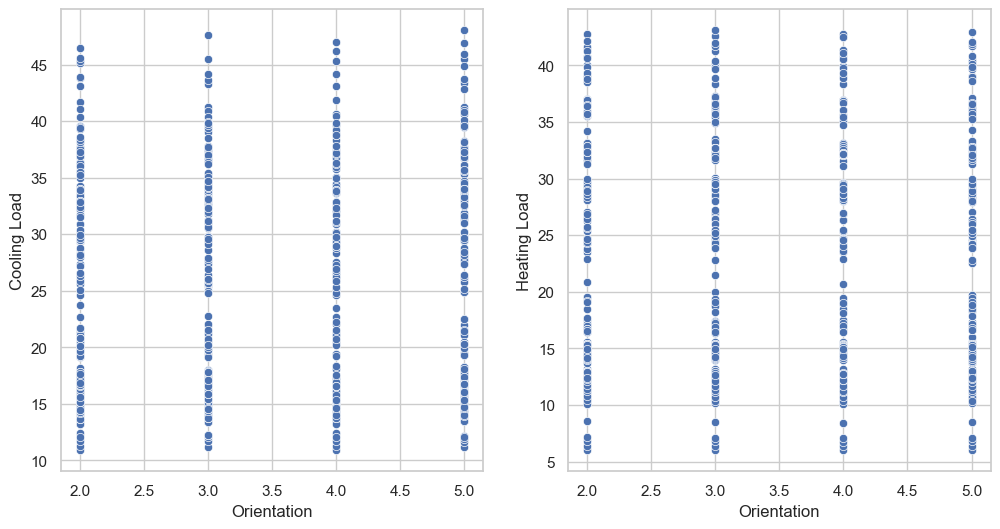

<IPython.core.display.Javascript object>

In [284]:
targets_scatterplot("Orientation")

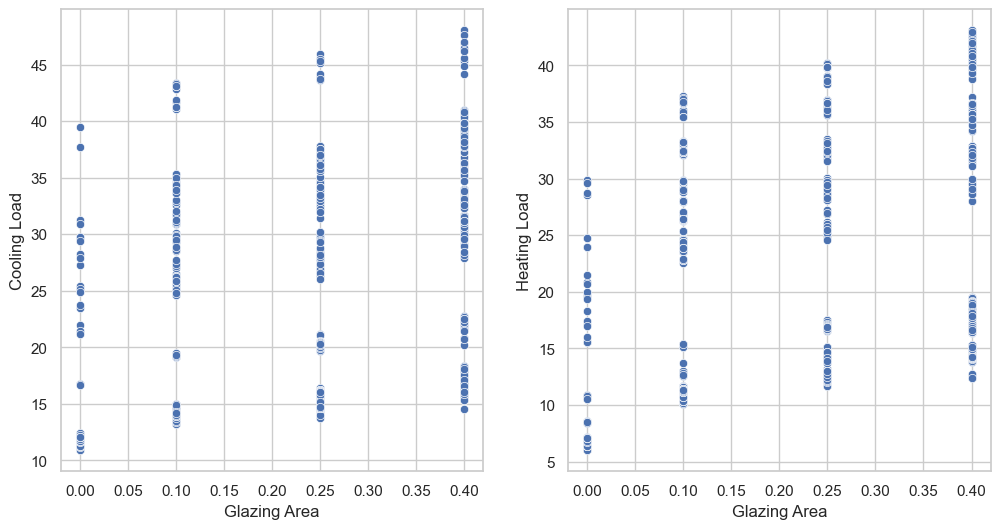

<IPython.core.display.Javascript object>

In [285]:
targets_scatterplot("Glazing Area")

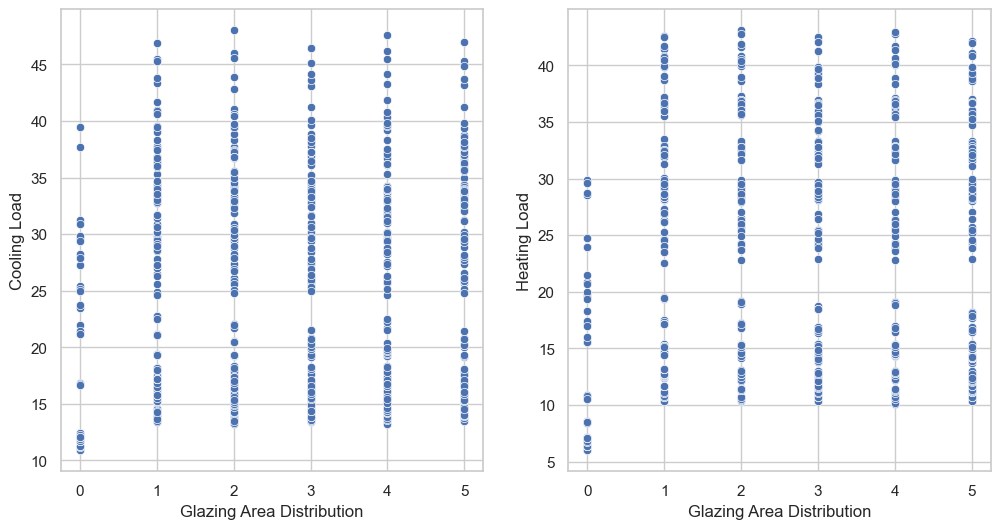

<IPython.core.display.Javascript object>

In [286]:
targets_scatterplot("Glazing Area Distribution")

Видно, что оба целевых признака примерно одинаково зависят от характеристик

In [287]:
y_cool = df["Cooling Load"]
y_heat = df["Heating Load"]
X = df.drop(columns=["Cooling Load", "Heating Load"])

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Feature corralation with Cooling Load')

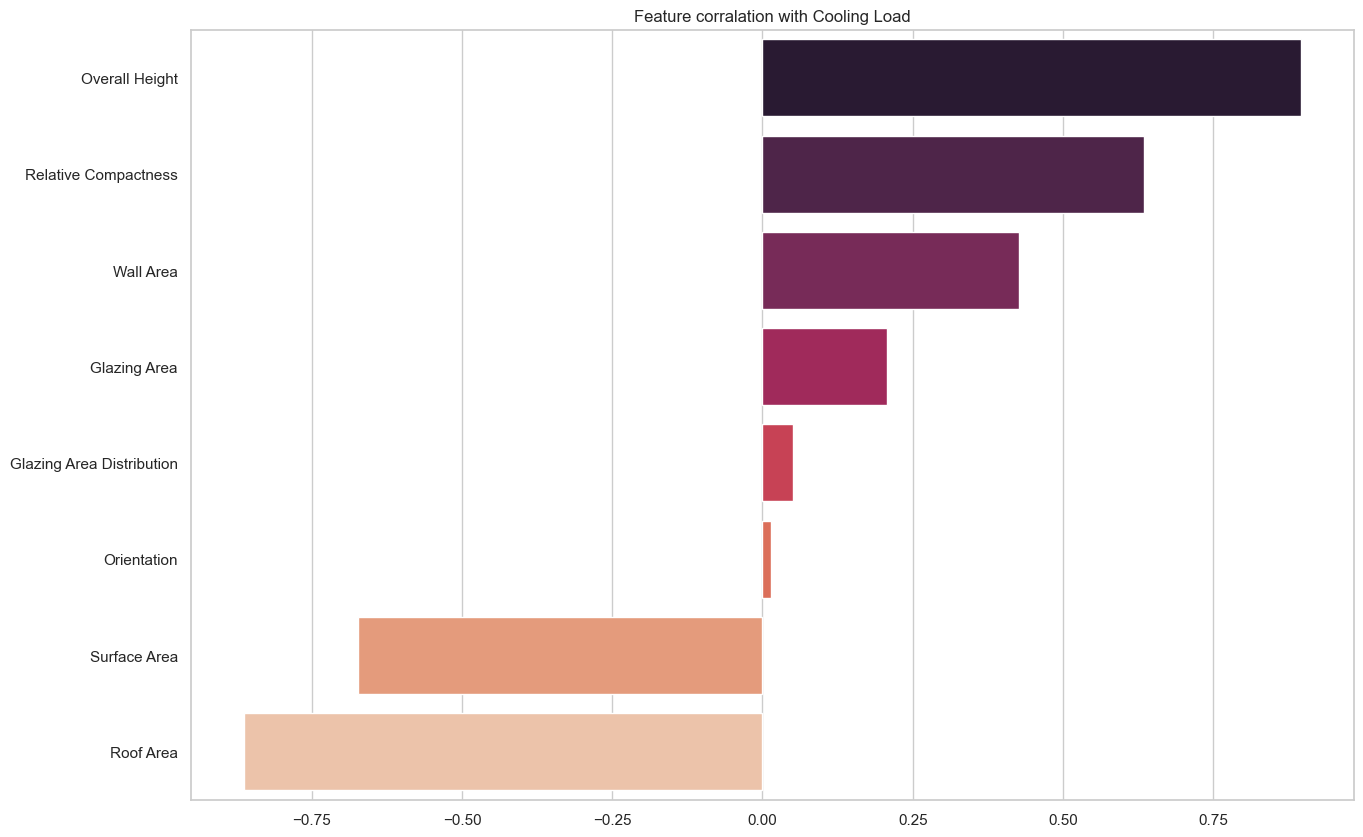

<IPython.core.display.Javascript object>

In [288]:
correlations = X.corrwith(y_cool).sort_values(ascending=False)
palette = sns.color_palette("rocket", correlations.size)
plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)
plot.figure.set_size_inches(15, 10)
plot.set_title("Feature corralation with Cooling Load")

Text(0.5, 1.0, 'Feature corralation with Heating Load')

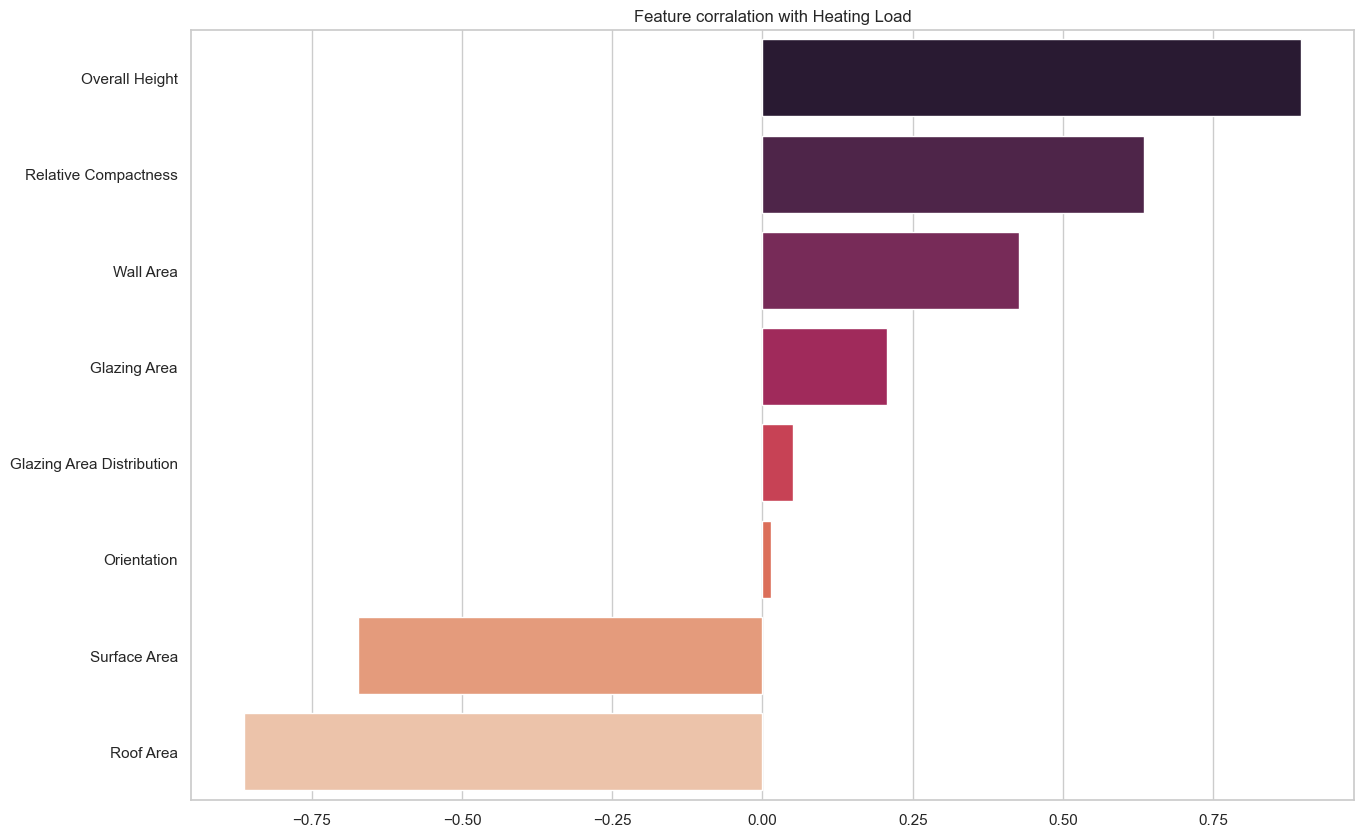

<IPython.core.display.Javascript object>

In [289]:
correlations = X.corrwith(y_cool).sort_values(ascending=False)
palette = sns.color_palette("rocket", correlations.size)
plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)
plot.figure.set_size_inches(15, 10)
plot.set_title("Feature corralation with Heating Load")

Можно заметить, что оба признака сильно коррелируют с `Roof Area`, `Surface Area`, `Relative Compactness` и `Overall Height`

### Feature Engineering

Преобразуем признаки `Glazing Area Distribution`, `Glazing Area`, `Orientation`, `Overall Height` и `Roof Area`в категориальные

In [290]:
cat_features = [
    "Glazing Area Distribution",
    "Glazing Area",
    "Orientation",
    "Overall Height",
    "Roof Area",
]
df[cat_features] = df[cat_features].astype("category")

<IPython.core.display.Javascript object>

### Разбиение выборки

In [291]:
X = df.drop(["Heating Load", "Cooling Load"], axis=1)
y = df[["Heating Load", "Cooling Load"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

<IPython.core.display.Javascript object>

### Построение моделей

In [292]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.metrics import r2_score

<IPython.core.display.Javascript object>

In [293]:
column_transformer = ColumnTransformer(
    [
        ("scaling", StandardScaler(), numeric_features),
        ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features),
    ]
)

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

<IPython.core.display.Javascript object>

In [294]:
def create_sklearn_ridge(alpha=1.0):
    pipeline = Pipeline(
        steps=[
            ("rfe", RFECV(estimator=Ridge())),
            ("regression", Ridge(alpha)),
        ]
    )
    return pipeline

<IPython.core.display.Javascript object>

In [295]:
r2_scores = {}
times = {}

<IPython.core.display.Javascript object>

In [296]:
alphas = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    create_sklearn_ridge(),
    [{"regression__alpha": alphas}],
    scoring="neg_root_mean_squared_error",
    cv=5,
)
searcher.fit(X_train_transformed, y_train)

best_alpha = searcher.best_params_["regression__alpha"]

<IPython.core.display.Javascript object>

**MultiOutputRegressor**

In [297]:
model = MultiOutputRegressor(create_sklearn_ridge(best_alpha))
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
time = get_fit_time(model, X_train_transformed, y_train)
r2 = r2_score(y_test, y_pred)
r2_scores["Ridge (MultiOutputRegressor)"] = r2
times["Ridge (MultiOutputRegressor)"] = time
print(f"Test R^2 {r2}")
print(f"Mean fit time {time}")

Test R^2 0.9138897871462578
Mean fit time 0.09095873832702636


<IPython.core.display.Javascript object>

**RegressorChain**

In [298]:
model = RegressorChain(create_sklearn_ridge(best_alpha))
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
time = get_fit_time(model, X_train_transformed, y_train)
r2 = r2_score(y_test, y_pred)
r2_scores["Ridge (RegressorChain)"] = r2
times["Ridge (RegressorChain)"] = time
print(f"Test R^2 {r2}")
print(f"Mean fit time {time}")

Test R^2 0.9127424474110177
Mean fit time 0.09294776916503907


<IPython.core.display.Javascript object>

### Сравнение моделей

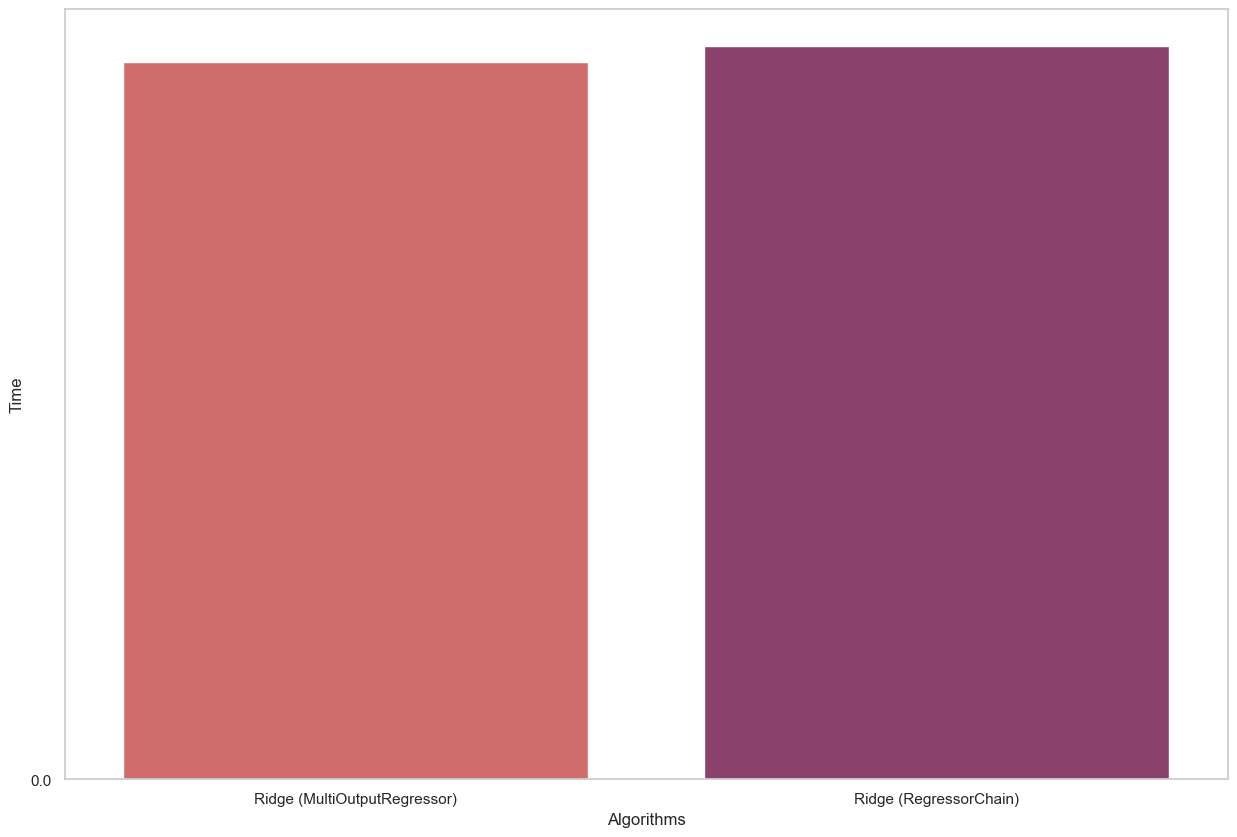

<IPython.core.display.Javascript object>

In [299]:
times = dict(sorted(times.items(), key=lambda item: item[1]))

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Time")
plt.xlabel("Algorithms")
plot = sns.barplot(
    x=list(times.keys()),
    y=list(times.values()),
    palette=sns.color_palette("flare", len(times)),
)
plot.figure.set_size_inches(15, 10)
plt.show()

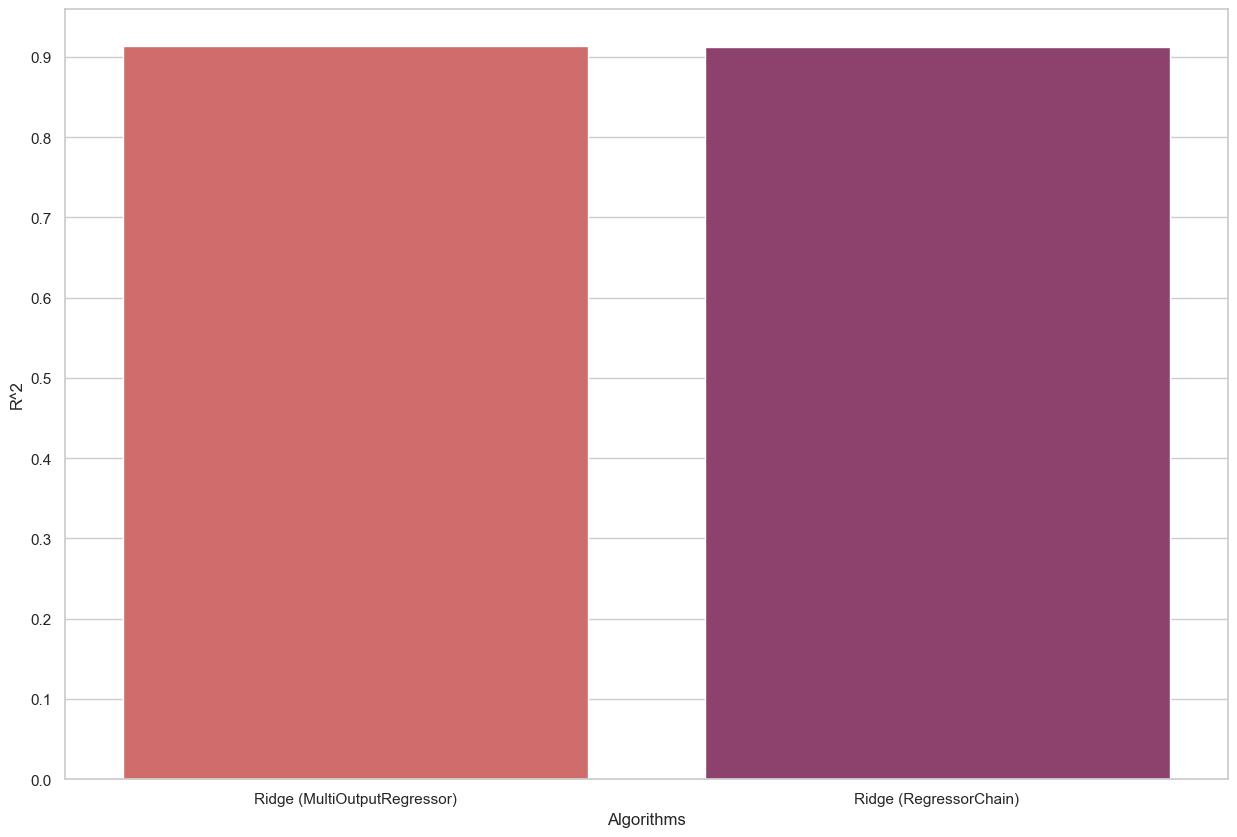

<IPython.core.display.Javascript object>

In [300]:
times = dict(sorted(r2_scores.items(), key=lambda item: item[1]))

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("R^2")
plt.xlabel("Algorithms")
plot = sns.barplot(
    x=list(r2_scores.keys()),
    y=list(r2_scores.values()),
    palette=sns.color_palette("flare", len(r2_scores)),
)
plot.figure.set_size_inches(15, 10)
plt.show()

### Вывод

- на выбранном наборе данных обе стратегии показывают примерно одинаковые результаты как по времени обучения, так и по качеству предсказаний.